In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd

In [5]:
client_id = '128166'
client_secret = 'ba4c5c2bc58ddf690409dbed30ac1c33b8574b44'
code = '6f85394f41eedbf3fcfb55d53e44b06a820dd6dc'


response = requests.post(
    url='https://www.strava.com/oauth/token',
    data={
        'client_id': client_id,
        'client_secret': client_secret,
        'code': code,
        'grant_type': 'authorization_code'
    }
)
response_data = response.json()
access_token = response_data['access_token']

print(response_data)

{'token_type': 'Bearer', 'expires_at': 1720196053, 'expires_in': 19427, 'refresh_token': 'bb413a7acdb72c6425ddebaeb9eba5942fa2c970', 'access_token': '5fc3dc03bd96c5bf3e4a1b0a7a3eada129d9eaac', 'athlete': {'id': 77466263, 'username': 'wsik_kuba', 'resource_state': 2, 'firstname': 'Jakub', 'lastname': 'Wąsik', 'bio': None, 'city': None, 'state': None, 'country': None, 'sex': 'M', 'premium': False, 'summit': False, 'created_at': '2021-01-31T14:35:35Z', 'updated_at': '2024-01-05T18:49:32Z', 'badge_type_id': 0, 'weight': 82.0, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/77466263/28433767/2/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/77466263/28433767/2/large.jpg', 'friend': None, 'follower': None}}


In [6]:
headers = {
    'Authorization': f'Bearer {access_token}'
}
activities_url = "https://www.strava.com/api/v3/athlete/activities"
response = requests.get(activities_url, headers=headers)
activities = response.json()

# Convert to DataFrame
df = pd.DataFrame(activities)

In [7]:
# Split the dataframe into running and riding
df_running = df[df['type'] == 'Run']
df_riding = df[df['type'] == 'Ride']

In [13]:
df_running.head(5)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,average_watts,kilojoules,device_watts,average_temp
0,2,"{'id': 77466263, 'resource_state': 1}",Evening Run,11230.4,3914,4130,32.0,Run,Run,0.0,...,12594922261,stripped_416E0440-F756-4124-985D-7167CB844DFE-...,False,2,0,False,NaN,NaN,NaN,NaN
1,2,"{'id': 77466263, 'resource_state': 1}",Evening Run,10877.8,4188,4547,51.2,Run,Run,0.0,...,12577992280,stripped_B81C9537-D1FC-4A84-A52B-047FE89137FB-...,False,1,1,False,NaN,NaN,NaN,NaN
2,2,"{'id': 77466263, 'resource_state': 1}",Night Run,8301.7,3264,3340,15.4,Run,Run,0.0,...,12530980269,stripped_A56648E2-8231-4F12-94C3-785A528798DD-...,False,0,0,False,NaN,NaN,NaN,NaN
3,2,"{'id': 77466263, 'resource_state': 1}",Night Run,5651.1,1724,1735,10.0,Run,Run,0.0,...,12513943084,stripped_81119AE2-58C1-4342-9BED-B34F7312B464-...,False,0,0,False,NaN,NaN,NaN,NaN
6,2,"{'id': 77466263, 'resource_state': 1}",Lunch Run,12855.9,4935,5157,228.0,Run,Run,0.0,...,12390266966,stripped_5A62EC0A-83BA-4432-9AB9-354E9ADAE6BB-...,False,18,3,False,NaN,NaN,NaN,NaN


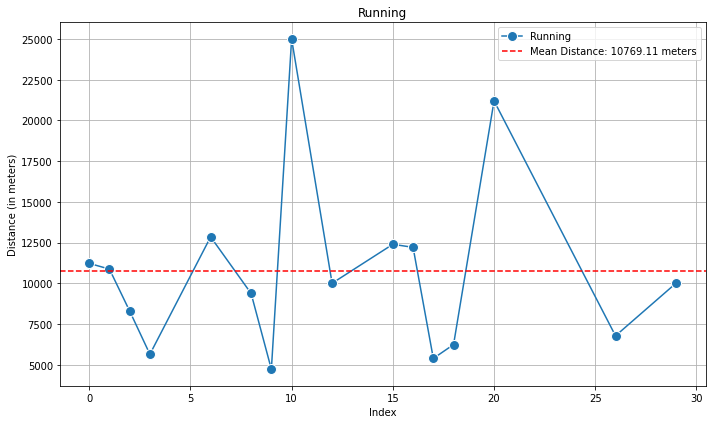

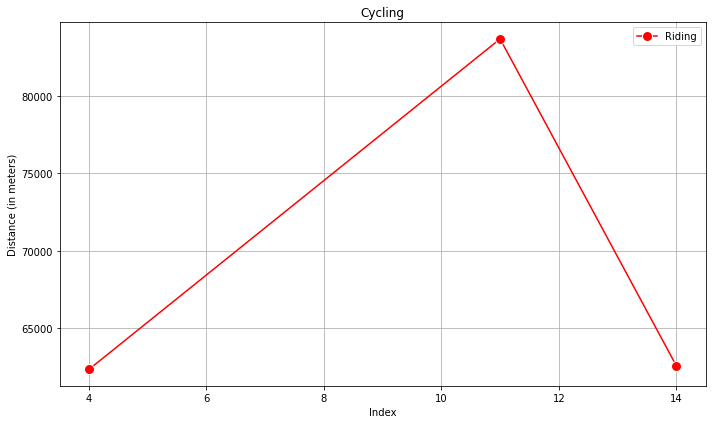

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df_running.index, df_running['distance'], marker='o', markersize=10, markeredgecolor='w', linestyle='-', label='Running')


mean_running_distance = df_running['distance'].mean()

plt.axhline(y=mean_running_distance, color='red', linestyle='--', label=f'Mean Distance: {mean_running_distance:.2f} meters')

# Add labels and title
plt.title('Running')
plt.xlabel('Index')
plt.ylabel('Distance (in meters)')

# Add legend
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_riding.index, df_riding['distance'], marker='o', markersize=10, markeredgecolor='w', linestyle='-', color='red', label='Riding')

# Add labels and title
plt.title('Cycling')
plt.xlabel('Index')
plt.ylabel('Distance (in meters)')

# Add legend
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

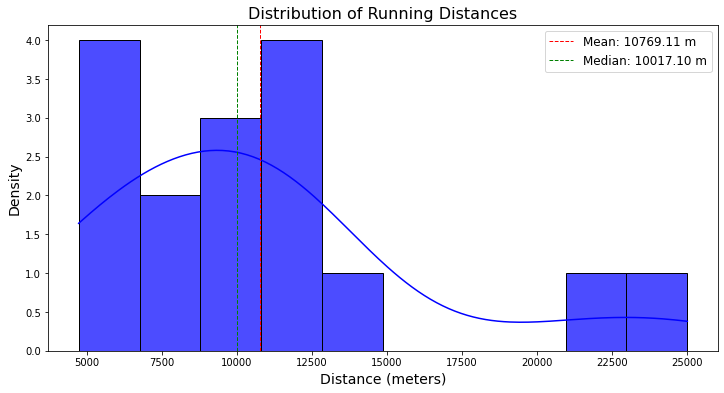

In [40]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Create histogram with KDE (Kernel Density Estimate) overlay
sns.histplot(df_running['distance'], bins=10, kde=True, color='blue', alpha=0.7, ax=ax)

# Customize labels and title
plt.title('Distribution of Running Distances', fontsize=16)
plt.xlabel('Distance (meters)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add vertical lines for mean and median distances
mean_distance = df_running['distance'].mean()
median_distance = df_running['distance'].median()

plt.axvline(mean_distance, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_distance:.2f} m')
plt.axvline(median_distance, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_distance:.2f} m')

# Add legend
plt.legend(fontsize=12)

# Display plot
plt.show()

In [42]:
df_running.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type',
       'workout_type', 'id', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'has_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'average_watts', 'kilojoules',
       'device_watts', 'average_temp'],
      dtype='object')